# System Neural Diversity 
## An Ensemble

In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from utils.nets import Neuron
from collections import defaultdict
import networkx as nx
from utils.transducer import Transducer
import numpy as np

## Single Agent

In [ ]:
# embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5]
# agent_hilbert = Agent('agent_hilbert_space',
#                       'documents/meowsmeowing.pdf', 1, embedding_params, False)
# agent_hilbert.chat_bot.one_question(
#     "Imagine how hilbert space could be used in a neural network for neuron representation?")

In [ ]:
# agent_hilbert.chat_bot.one_question(
#     "Provide evidence of neural networks being hard to maintain and finetune")

## Pack

In [2]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd_m2"  # "documents/meowsmeowing.pdf"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = "chroma_db/agent_norbert_m2"
viz_quant = "chroma_db/agent_quant"
cot_path = "chroma_db/agent_cot"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["sentence-transformers/all-MiniLM-L6-v2", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["sentence-transformers/all-mpnet-base-v2", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd_m2', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_norbert_m2', norbet_cog, 0, True],
    ['agent_cot', cot_path, 1, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_ltoa ...
agent agent_ltoa loaded

🧚 creating chat_bot   🧚

the path  being used for agent_ltoa is chroma_db/agent_ltoa
🌈 
🔥  Conjuring up agent_snd_m2  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_snd_m2 ...
agent agent_snd_m2 loaded

🧚 creating chat_bot   🧚

the path  being used for agent_snd_m2 is chroma_db/agent_snd_m2
🌈 
🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_foundation ...
agent agent_foundation loaded

🧚 creating chat_bot   🧚

the path  being used for agent_foundation is chroma_db/agent_foundation
🌈 
🔥  Conjuring up agent_norbert_m2  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_norbert_m2 ...
agent agent_norbert_m2 loaded

🧚 creating chat_bot   🧚

the path  being used for agent_norbert_m2 is chroma_db/agent_norbert_m2
🌈 
🔥  Conjuring up agent_cot  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
lo

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

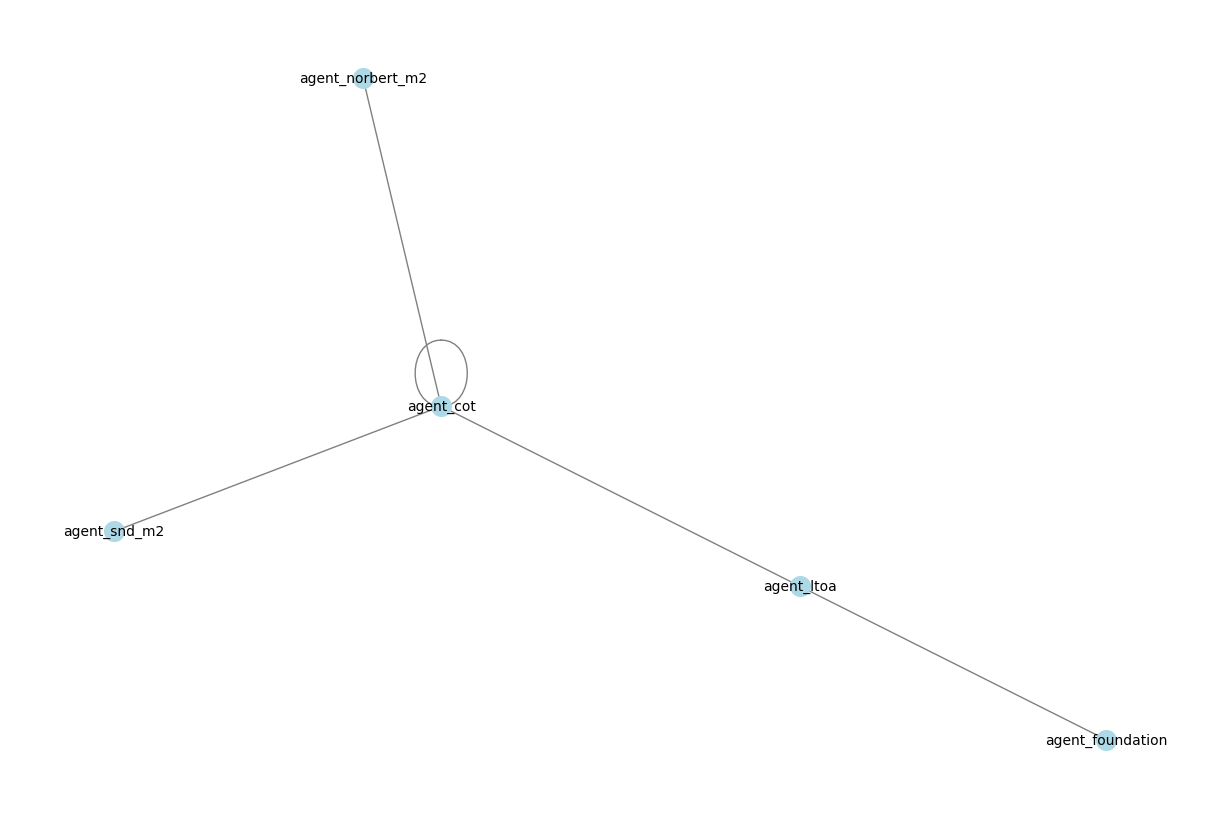

 eigen_values: {'agent_ltoa': 0.3988388513892817, 'agent_cot': 0.7733576625746919, 'agent_snd_m2': 0.3273689458201971, 'agent_foundation': 0.16883318093500826, 'agent_norbert_m2': 0.3273689458201971}
Degree Centrality: {'agent_ltoa': 0.5, 'agent_cot': 1.25, 'agent_snd_m2': 0.25, 'agent_foundation': 0.25, 'agent_norbert_m2': 0.25}


In [3]:
test_pack.one_question(
    prompt="Imagine based on the text how Neurons may be represented with math or as a wave?")
test_pack.update_edges()
test_pack.graph()

In [4]:
print(test_pack.get_snd())

3


In [5]:
for name, agent in test_pack.agents_dict.items():
    print(agent.state)

[0.17664956077020344, 0.02110195906294232, 0.2830792472999576]
[0.9432460956388066, 0.30685401374329424, 0.5968371442785215]
[0.052997738439038655, 0.7395748638755301, 0.42577941952065657]
[0.6611743941472282, 0.4606502099304528, 0.6734528115396249]
[0.668397432569827, 0.4608052692224974, 0.18800556947724623]


## Neuron Representation

In [6]:
test_pack.one_question(
    prompt="Imagine based on the text how money may be decoupled from design of AI",
    neuron_representation=True)
test_pack.update_edges()
test_pack.graph()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

['Based', 'on', 'the', 'text,', 'it', 'appears', 'that', 'the', 'paper', 'is', 'discussing', 'a', 'method', 'for', 'optimizing', 'neural', 'network-based', 'agents', 'for', 'reinforcement', 'learning', 'tasks', 'through', 'the', 'optimization', 'of', 'neuro-centric', 'parameters', 'alone,', 'without', 'optimizing', 'any', 'of', 'the', 'neural', 'network', 'weights.', 'This', 'approach', 'involves', 'evolving', 'diverse', 'neurons', 'in', 'randomly', 'initialized', 'networks,', 'and', 'it', 'aims', 'to', 'test', 'how', 'well', 'a', 'neural', 'network-based', 'agent', 'can', 'perform', 'reinforcement', 'learning', 'tasks', 'without', 'focusing', 'on', 'optimizing', 'neural', 'network', 'weights.', 'Therefore,', 'it', 'seems', 'that', 'the', 'approach', 'presented', 'in', 'the', 'paper', 'aims', 'to', 'decouple', 'the', 'optimization', 'of', 'the', "AI's", 'performance', 'from', 'the', 'traditional', 'focus', 'on', 'the', 'financial', 'and', 'computational', 'costs', 'associated', 'with',

AttributeError: 'list' object has no attribute 'neural_params'